In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime
from datetime import timedelta
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

## The problem is that if I do the first diff I won;t be able to work my way back to the variance/std of the original time series. I do first diff cause u need stationarity but then.... So I got the % changes instead of the oil values (maybe the time series will be stationary)

In [2]:
df=pd.read_csv(r"C:\Users\Bogdan\OneDrive - University of Warwick\Desktop\Projects\Short-Term WTI Price Forecasting\Price prediction\Data.csv")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['WTI'] = pd.to_numeric(df['WTI'])
df = df.sort_values(by='DATE', ascending=True)
df = df.set_index('DATE')
df = df.drop(columns=['Dubai','UK','Dubai Price', 'Texas', 'Brent'])
df = df.asfreq(pd.infer_freq(df.index))
df = df.resample('W').mean()
df['Pct_Change'] = df['WTI'].pct_change() * 100
df = df.drop(columns=['WTI'])
df['Std_Dev'] = df['Pct_Change'].expanding().std() #expanding() = allows you to apply a statistical function cumulatively from the start of a dataset up to each point in the dataset
df = df.dropna()
df

C:\Users\Bogdan\AppData\Local\Temp\ipykernel_4760\3118630425.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Pct_Change'] = df['WTI'].pct_change() * 100


,Pct_Change,Std_Dev
DATE,,
2020-07-26,1.893024,1.084939
2020-08-02,-1.577241,1.739001
2020-08-09,1.165020,1.495686
2020-08-16,2.225462,1.516993
2020-08-23,1.544824,1.389344
...,...,...
2024-08-11,-1.635411,4.111263
2024-08-18,4.156503,4.109715
2024-08-25,-5.467895,4.119573


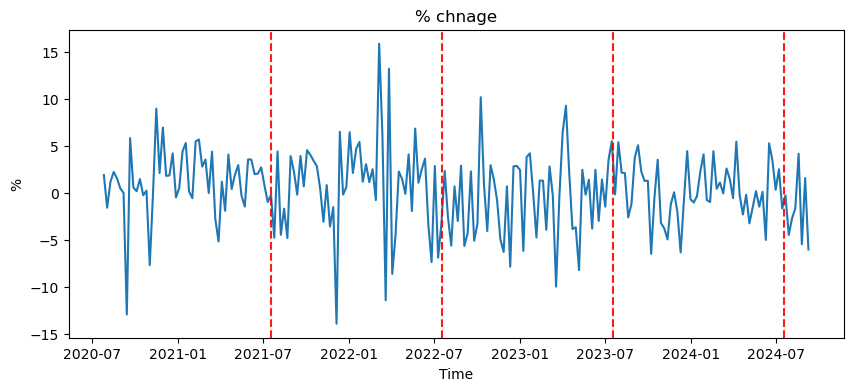

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df['Pct_Change'])
plt.title('% chnage')
plt.xlabel('Time')
plt.ylabel('%')
for year in range(2021,2025):
    plt.axvline(pd.to_datetime(str(year)+'-07-18'),color='r', linestyle='--', alpha=0.9)
plt.show()

In [4]:
result = adfuller(df['Pct_Change'])
p_value = result[1]
formatted_p_value = "{:.2f}".format(p_value) #int 2 deicimal places
print("p-value:", formatted_p_value)

p-value: 0.00


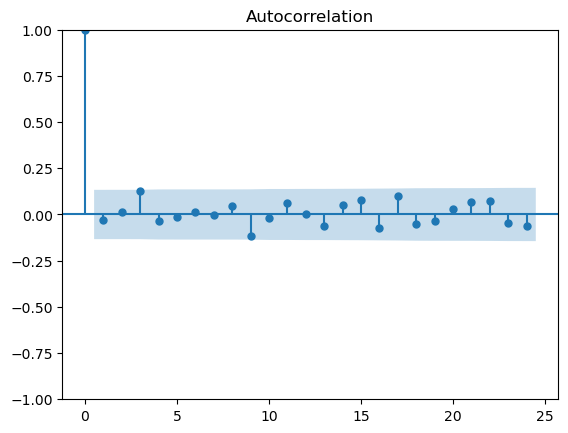

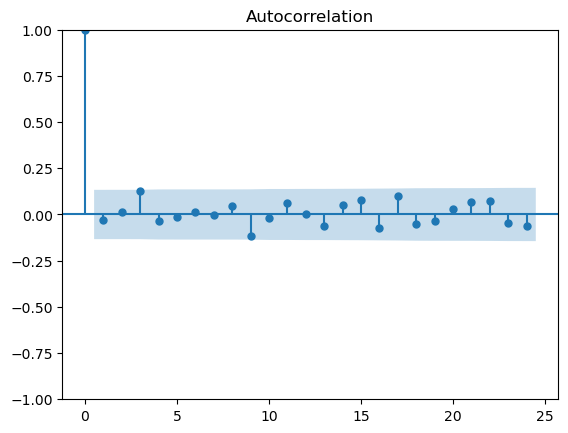

In [5]:
plot_acf(df['Pct_Change'])

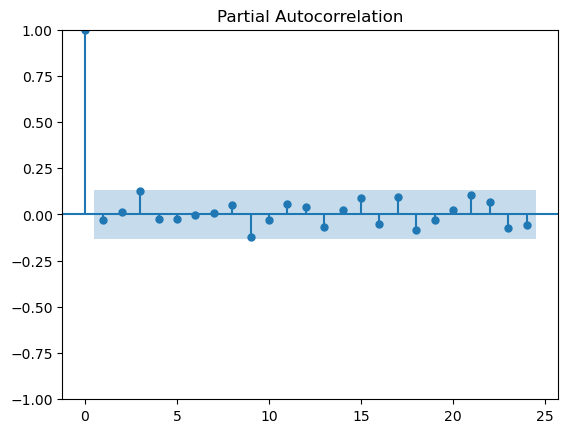

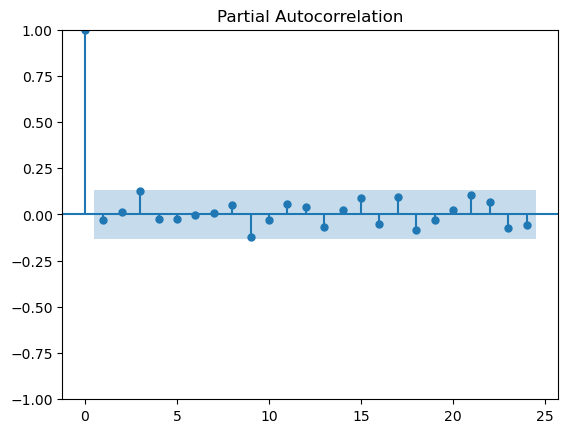

In [6]:
plot_pacf(df['Pct_Change'])

In [7]:
train_end = datetime(2024,5,31)

train_data = df['Pct_Change'][:train_end]
test_data = df[train_end + timedelta(days=1):]

In [8]:
model = arch_model(train_data, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 990.9018802024241
Iteration:      2,   Func. Count:     21,   Neg. LLF: 883.8783579278409
Iteration:      3,   Func. Count:     32,   Neg. LLF: 576.7208967999283
Iteration:      4,   Func. Count:     42,   Neg. LLF: 570.4021978317608
Iteration:      5,   Func. Count:     53,   Neg. LLF: 570.8688657388592
Iteration:      6,   Func. Count:     63,   Neg. LLF: 571.1145850307462
Iteration:      7,   Func. Count:     73,   Neg. LLF: 570.8468969673373
Iteration:      8,   Func. Count:     83,   Neg. LLF: 569.2609807055021
Iteration:      9,   Func. Count:     93,   Neg. LLF: 568.6816048996141
Iteration:     10,   Func. Count:    102,   Neg. LLF: 568.6392641327103
Iteration:     11,   Func. Count:    111,   Neg. LLF: 568.6271804286594
Iteration:     12,   Func. Count:    120,   Neg. LLF: 568.6178574870075
Iteration:     13,   Func. Count:    129,   Neg. LLF: 568.6158741929892
Iteration:     14,   Func. Count:    138,   Neg. LLF: 568.614968

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Pct_Change   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -568.615
Distribution:                  Normal   AIC:                           1153.23
Method:            Maximum Likelihood   BIC:                           1179.66
                                        No. Observations:                  201
Date:                Mon, Sep 23 2024   Df Residuals:                      200
Time:                        18:20:02   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4309      0.286      1.507      0.132 [ -0.130,  0.991]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.0749      3.110      0.667      0.505      [ -4.020,  8.169]
alpha[1]       0.0224  3.246e-02      0.691      0.490 [-4.119e-02,8.606e-02]
alpha[2]       0.0740  4.139e-02      1.787  7.387e-02   [-7.141e-03,  0.155]
alpha[3]       0.0000  8.347e-02      0.000      1.000      [ -0.164,  0.164]
beta[1]    4.3531e-13      0.443  9.822e-13      1.000      [ -0.869,  0.869]
beta[2]        0.5351      0.122      4.389  1.138e-05      [  0.296,  0.774]
beta[3]        0.2439      0.244      1.000      0.317      [ -0.234,  0.722]
=============================================================================

Covariance estimator: robust
"""

In [9]:
rolling_predictions = pd.Series(index=test_data.index)

for i in test_data.index:
    train_data = df['Pct_Change'][:i - timedelta(days=1)]
    model = arch_model(train_data, p=3, q=3)
    model_fit = model.fit()
    predictions = model_fit.forecast(horizon=1)
    rolling_predictions.loc[i] = np.sqrt(predictions.variance.values[-1]) #the output of predictions is an array
    
rolling_predictions

Iteration:      1,   Func. Count:     10,   Neg. LLF: 990.9018802024241
Iteration:      2,   Func. Count:     21,   Neg. LLF: 883.8783579278409
Iteration:      3,   Func. Count:     32,   Neg. LLF: 576.7208967999283
Iteration:      4,   Func. Count:     42,   Neg. LLF: 570.4021978317608
Iteration:      5,   Func. Count:     53,   Neg. LLF: 570.8688657388592
Iteration:      6,   Func. Count:     63,   Neg. LLF: 571.1145850307462
Iteration:      7,   Func. Count:     73,   Neg. LLF: 570.8468969673373
Iteration:      8,   Func. Count:     83,   Neg. LLF: 569.2609807055021
Iteration:      9,   Func. Count:     93,   Neg. LLF: 568.6816048996141
Iteration:     10,   Func. Count:    102,   Neg. LLF: 568.6392641327103
Iteration:     11,   Func. Count:    111,   Neg. LLF: 568.6271804286594
Iteration:     12,   Func. Count:    120,   Neg. LLF: 568.6178574870075
Iteration:     13,   Func. Count:    129,   Neg. LLF: 568.6158741929892
Iteration:     14,   Func. Count:    138,   Neg. LLF: 568.614968

DATE
2024-06-02    3.446693
2024-06-09    3.378052
2024-06-16    3.484022
2024-06-23    3.797724
2024-06-30    3.694903
2024-07-07    3.638498
2024-07-14    3.554260
2024-07-21    3.539044
2024-07-28    3.454001
2024-08-04    3.518013
2024-08-11    3.667922
2024-08-18    3.488732
2024-08-25    3.570021
2024-09-01    3.736432
2024-09-08    3.791842
Freq: W-SUN, dtype: float64

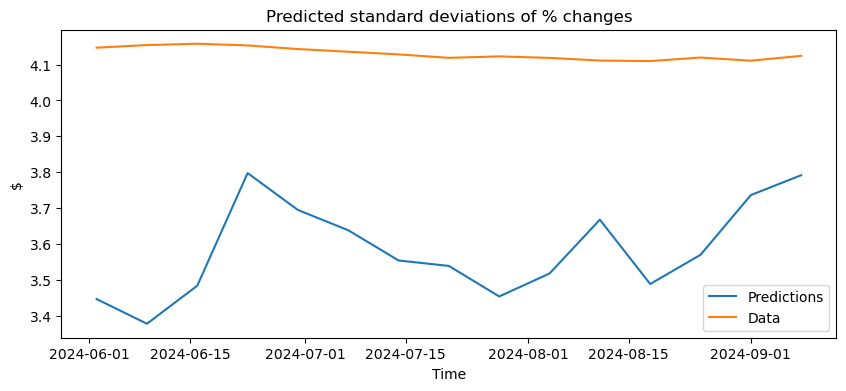

In [10]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions, label='Predictions')
plt.plot(test_data['Std_Dev'], label='Data')
plt.title('Predicted standard deviations of % changes')
plt.ylabel('$')
plt.xlabel('Time')
plt.legend()

Text(0, 0.5, '$')

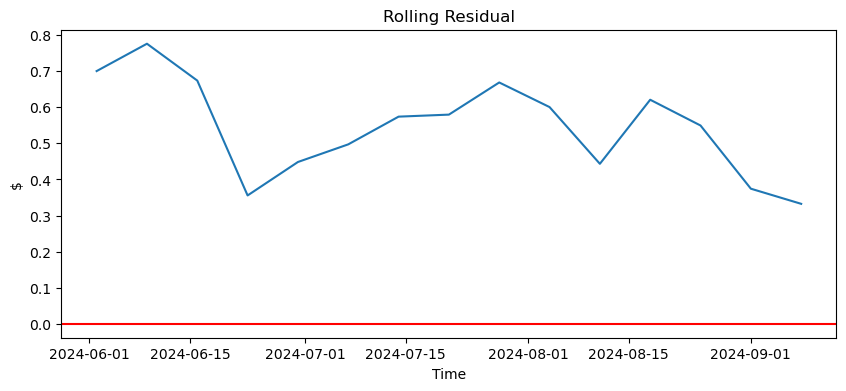

In [11]:
rolling_residual = test_data['Std_Dev'] - rolling_predictions

plt.figure(figsize=(10,4))
plt.plot(rolling_residual)
plt.axhline(y=0, color = 'r')
plt.title('Rolling Residual')
plt.xlabel('Time')
plt.ylabel('$')

In [12]:
print('Mean abs % error:',np.mean(abs(rolling_residual/test_data['Std_Dev'])))

Mean abs % error: 0.13225547929950573


In [13]:
print('Root mean squared error:',np.sqrt(np.mean(rolling_residual**2)))

Root mean squared error: 0.5616061405509851
